TASK 1: SIFT FEATURE EXTRACTION

In [1]:
import cv2
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('chaeyoung-cute.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

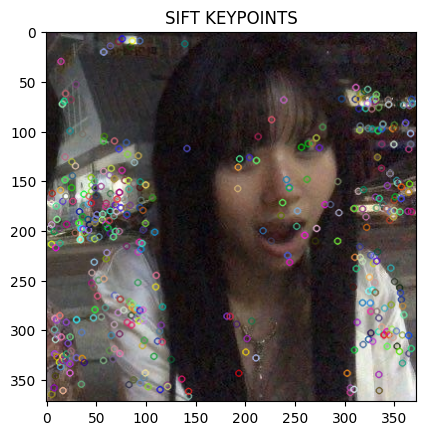

In [7]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT KEYPOINTS')
plt.show()

TASK 2: SURF FEATURE EXTRACTION

In [14]:
!pip install opencv-contrib-python --upgrade

In [26]:
import cv2
import matplotlib.pyplot as plt

In [27]:
image = cv2.imread('chaeyoung-cute.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

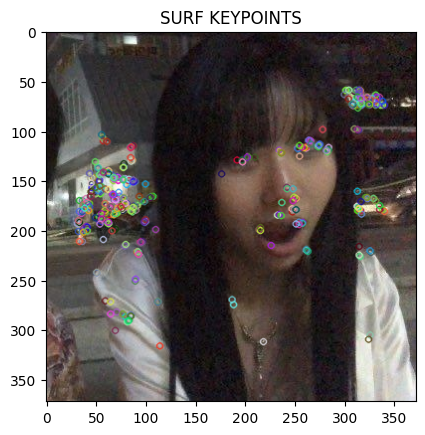

In [25]:
surf = cv2.ORB_create()
keypoints, descriptors = surf.detectAndCompute(gray_image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF KEYPOINTS')
plt.show()


TASK 3: ORB FEATURE EXTRACTION

In [22]:
image = cv2.imread('chaeyoung-cute.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

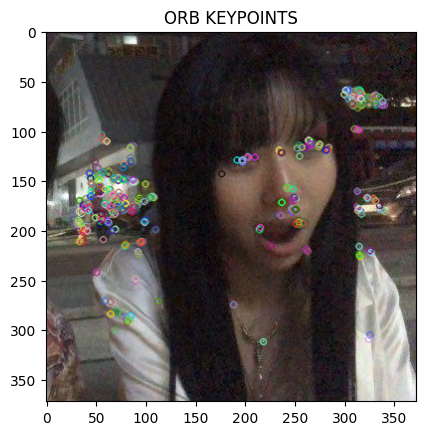

In [23]:
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray_image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB KEYPOINTS')
plt.show()

TASK 4: FEATURE MATCHING

In [30]:
image1 = cv2.imread('chaeyoung-cute.jpg')
image2 = cv2.imread('chaechae.jpg')

In [32]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x: x.distance)

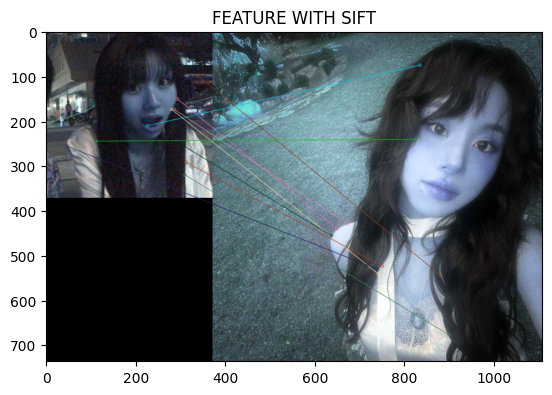

In [33]:
image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(image_matches)
plt.title('FEATURE WITH SIFT')
plt.show()

TASK 5: APPLICATIONS OF FEATURE MATCHING

In [34]:
image1 = cv2.imread('chaeyoung-cute.jpg')
image2 = cv2.imread('chaechae.jpg')

In [35]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [42]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k = 2)

In [48]:
good_matches = []

for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

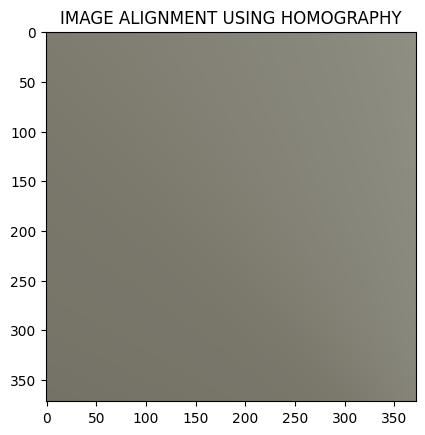

In [55]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

h, w, _ = image1.shape
result = cv2.warpPerspective(image1, M, (w, h))

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('IMAGE ALIGNMENT USING HOMOGRAPHY')
plt.show()

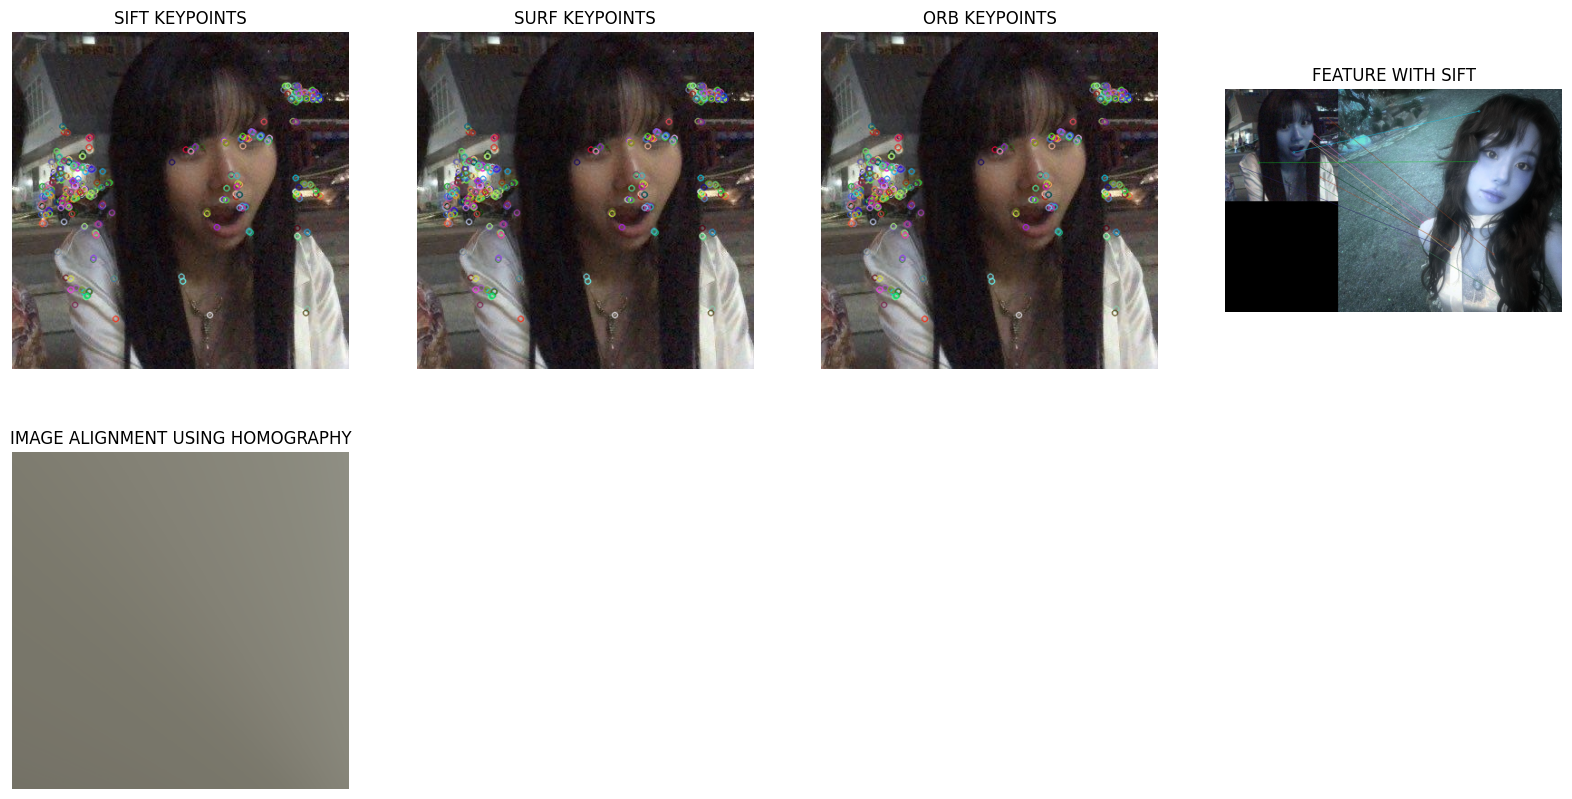

In [54]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT KEYPOINTS')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF KEYPOINTS')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB KEYPOINTS')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(image_matches)
plt.title('FEATURE WITH SIFT')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('IMAGE ALIGNMENT USING HOMOGRAPHY')
plt.axis('off')

plt.show()